In [24]:
sudo apt-get install texlive-xetex texlive-fonts-recommended texlive-generic-recommended


SyntaxError: invalid syntax (2303040923.py, line 1)

In [1]:
import cv2
import numpy as np
import  matplotlib.pyplot as plt


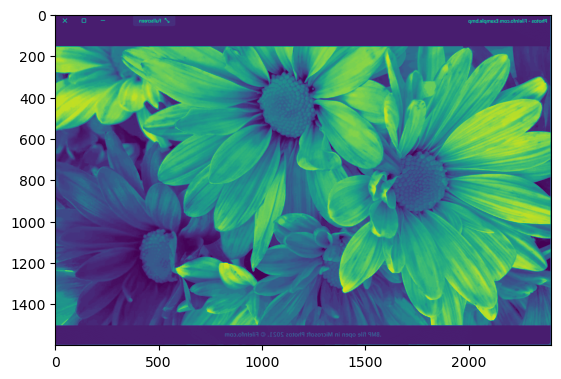

In [3]:
image = cv2.imread("/home/nalin/Downloads/bmp_13.webp",cv2.IMREAD_GRAYSCALE)

#cv2.imshow("image",image)
plt.imshow(image[...,::-1])

In [19]:
def calculate_brightness(image):
    brightness = cv2.mean(image)[0]
    return brightness

In [20]:
brightness = calculate_brightness(image)

print("Brightness:", brightness)

Brightness: 110.57725870335626


In [18]:
def calculate_contrast(image):


    min_val = np.min(image)

    max_val = np.max(image)



    contrast = (max_val - min_val) / (max_val + min_val)


    return contrast


contrast = calculate_contrast(image)

print("Contrast:", contrast)

Contrast: 58.5


/tmp/ipykernel_439631/519183168.py:10: RuntimeWarning: overflow encountered in scalar add
  contrast = (max_val - min_val) / (max_val + min_val)


In [7]:
def calculate_contrast(image):
    contrast = cv2.calcHist([image], [0], None, [256], [0, 256]).var()
    return contrast

In [8]:

contrast = calculate_contrast(image)

print("Contrast:", contrast)


Contrast: 1405881600.0


In [9]:
for i in range(3):
  (min_val, max_val, min_loc, max_loc) = cv2.minMaxLoc(image[:,i])
  print(max_val,min_val)

165.0 80.0
165.0 80.0
211.0 15.0


In [10]:
#for i in range(3):
#(min_val, max_val, min_loc, max_loc) = cv2.minMaxLoc(image)
#print(max_val,min_val)

In [11]:
range_value = max_val -min_val
print("range=" ,range_value)

range= 196.0


In [12]:
def calculate_contrast(image):


    min_val = np.min(image)

    max_val = np.max(image)



    contrast = (max_val - min_val) / (max_val + min_val)


    return contrast


contrast = calculate_contrast(image)

print("Contrast:", contrast)

Contrast: 58.5


/tmp/ipykernel_439631/519183168.py:10: RuntimeWarning: overflow encountered in scalar add
  contrast = (max_val - min_val) / (max_val + min_val)


In [13]:
aspect_ratio = calculate_aspect_ratio(image)
print("Aspect Ratio:", aspect_ratio)


NameError: name 'calculate_aspect_ratio' is not defined

In [14]:
def calculate_mean(image):
    height, width, channels = image.shape
    mean=0
    for i in range(height):
        for j in range(width):
            for k in range(channels):
                mean += image[i,j,k]
    mean /= (height*width*channels)
    print(mean)
    return calculate_mean
#image = cv2.imread("/home/nalin/Downloads/bmp_13.webp")
#print(calculate_mean)
mean_value = calculate_mean(image)

ValueError: not enough values to unpack (expected 3, got 2)

In [15]:
#for grayscale
def calculate_standard_deviation(image):
    height, width = image.shape

    mean = 0
    for i in range(height):
        for j in range(width):
            mean += image[i, j]
    mean /= (height * width)
    print("mean(Brightness)=",mean)

    variance = 0
    for i in range(height):
        for j in range(width):
            variance += (image[i, j] - mean) ** 2
    variance /= (height * width)
    print("variance=",variance)

    std_dev = variance ** 0.5

    return std_dev

std_dev = calculate_standard_deviation(image)
print("Standard Deviation:", std_dev)

mean(Brightness)= 110.57725870335626
variance= 3682.138031516042
Standard Deviation: 60.680623196503525


In [209]:
import cv2
import numpy as np

def calculate_skewness(image):
    mean = np.mean(image)
    stddev = np.std(image)

    skewness = np.sum((image - mean) ** 3) / (image.size * stddev ** 3)

    return skewness
skewness = calculate_skewness(image)
print("Skewness:", skewness)

Skewness: -6.440467306812302


Brightness: 110.57725870335626
Contrast: 60.68062319645113
Range: 234
Aspect Ratio: 1.5009380863039399
Standard Deviation: 60.68062319645113
Skewness: 0.05668348867877543


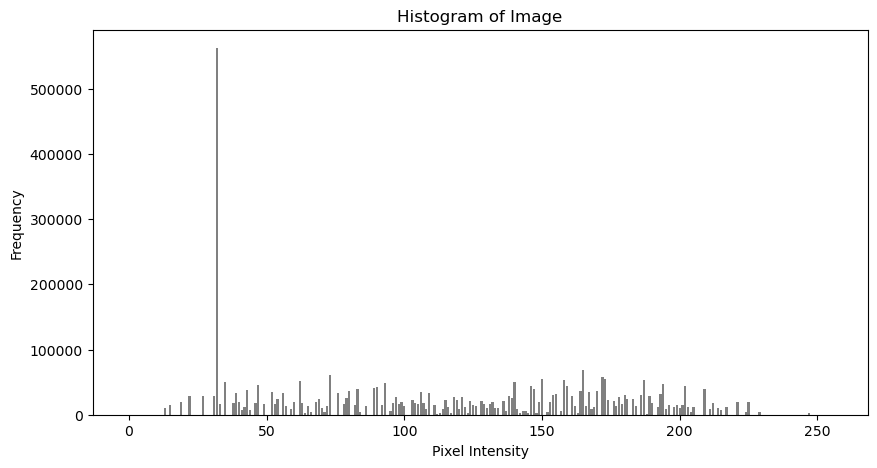

In [21]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Read the image using OpenCV
image = cv2.imread('/home/nalin/Downloads/bmp_13.webp')  # Replace 'image.jpg' with your image file path

# Convert the image to grayscale for calculations that require it
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# 1. Brightness
def calculate_brightness(gray_image):
    total_pixels = gray_image.shape[0] * gray_image.shape[1]
    brightness = np.sum(gray_image) / total_pixels
    return brightness

# 2. Contrast
def calculate_contrast(gray_image, brightness):
    total_pixels = gray_image.shape[0] * gray_image.shape[1]
    contrast = np.sqrt(np.sum((gray_image - brightness) ** 2) / total_pixels)
    return contrast

# 3. Histogram
def calculate_histogram(gray_image):
    histogram = [0] * 256
    for pixel in gray_image.flatten():
        histogram[pixel] += 1
    return histogram

# 4. Range
def calculate_range(gray_image):
    return np.max(gray_image) - np.min(gray_image)

# 5. Aspect Ratio
def calculate_aspect_ratio(image):
    height, width = image.shape[:2]
    return width / height

# 6. Convert RGB to HSV
def rgb_to_hsv(image):
    image = image.astype('float') / 255.0
    hsv_image = np.zeros_like(image)
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            r, g, b = image[i, j]
            max_val = max(r, g, b)
            min_val = min(r, g, b)
            delta = max_val - min_val
            
            # Hue calculation
            if delta == 0:
                h = 0
            elif max_val == r:
                h = (60 * ((g - b) / delta) + 360) % 360
            elif max_val == g:
                h = (60 * ((b - r) / delta) + 120) % 360
            elif max_val == b:
                h = (60 * ((r - g) / delta) + 240) % 360
            
            # Saturation calculation
            s = 0 if max_val == 0 else delta / max_val
            
            # Value calculation
            v = max_val
            
            hsv_image[i, j] = [h, s, v]
    
    return hsv_image

# 7. Standard Deviation
def calculate_standard_deviation(gray_image, brightness):
    total_pixels = gray_image.shape[0] * gray_image.shape[1]
    variance = np.sum((gray_image - brightness) ** 2) / total_pixels
    return np.sqrt(variance)

# 8. Skewness
def calculate_skewness(gray_image, brightness, std_dev):
    total_pixels = gray_image.shape[0] * gray_image.shape[1]
    skewness = np.sum(((gray_image - brightness) / std_dev) ** 3) / total_pixels
    return skewness

# Calculate all the statistics
brightness = calculate_brightness(gray_image)
contrast = calculate_contrast(gray_image, brightness)
histogram = calculate_histogram(gray_image)
range_ = calculate_range(gray_image)
aspect_ratio = calculate_aspect_ratio(image)
hsv_image = rgb_to_hsv(image)
std_dev = calculate_standard_deviation(gray_image, brightness)
skewness = calculate_skewness(gray_image, brightness, std_dev)

# Display the results
print(f'Brightness: {brightness}')
print(f'Contrast: {contrast}')
print(f'Range: {range_}')
print(f'Aspect Ratio: {aspect_ratio}')
print(f'Standard Deviation: {std_dev}')
print(f'Skewness: {skewness}')

# Plot Histogram
plt.figure(figsize=(10, 5))
plt.bar(range(256), histogram, color='gray')
plt.title('Histogram of Image')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.show()


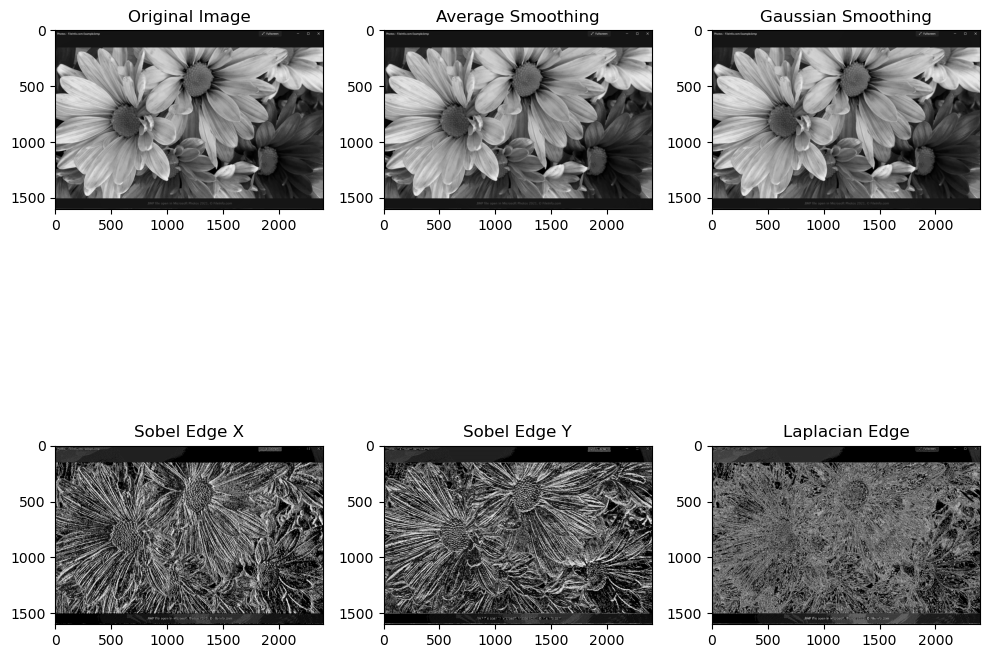

In [23]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Read the image in grayscale
image = cv2.imread('/home/nalin/Downloads/bmp_13.webp', cv2.IMREAD_GRAYSCALE)  # Replace 'image.jpg' with your image file path

# Function to apply convolution
def apply_convolution(image, kernel, padding=0):
    """
    Apply convolution to the given image using the specified kernel.

    :param image: Input image as a 2D numpy array.
    :param kernel: Kernel as a 2D numpy array.
    :param padding: Number of pixels to pad around the image (default is 0).
    :return: Convolved image.
    """
    # Flip the kernel (this is necessary for convolution)
    kernel = np.flipud(np.fliplr(kernel))
    
    # Get dimensions of the image and kernel
    image_h, image_w = image.shape
    kernel_h, kernel_w = kernel.shape
    
    # Pad the image with zeros (if padding is required)
    if padding > 0:
        padded_image = np.zeros((image_h + 2 * padding, image_w + 2 * padding))
        padded_image[padding:image_h + padding, padding:image_w + padding] = image
    else:
        padded_image = image
    
    # Output image dimensions
    output = np.zeros_like(image)
    
    # Apply convolution
    for i in range(image_h):
        for j in range(image_w):
            # Extract region of interest
            region = padded_image[i:i + kernel_h, j:j + kernel_w]
            # Element-wise multiplication and summation
            output[i, j] = np.sum(region * kernel)
    
    return output

# 1. Average Smoothing Filter
average_kernel = np.ones((3, 3)) / 9  # 3x3 kernel for average smoothing
smoothed_image_average = apply_convolution(image, average_kernel, padding=1)

# 2. Gaussian Smoothing Filter
def create_gaussian_kernel(size, sigma):
    """
    Create a Gaussian kernel of given size and standard deviation.

    :param size: Size of the kernel (must be odd).
    :param sigma: Standard deviation of the Gaussian distribution.
    :return: Gaussian kernel as a 2D numpy array.
    """
    kernel = np.zeros((size, size))
    center = size // 2
    s = 2 * (sigma ** 2)
    
    for x in range(-center, center + 1):
        for y in range(-center, center + 1):
            kernel[x + center, y + center] = np.exp(-(x**2 + y**2) / s)
    
    return kernel / np.sum(kernel)

gaussian_kernel = create_gaussian_kernel(3, 1)  # 3x3 Gaussian kernel with sigma=1
smoothed_image_gaussian = apply_convolution(image, gaussian_kernel, padding=1)

# 3. Sobel Edge Detection Filters
sobel_x_kernel = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
sobel_y_kernel = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]])

edge_image_sobel_x = apply_convolution(image, sobel_x_kernel, padding=1)
edge_image_sobel_y = apply_convolution(image, sobel_y_kernel, padding=1)

# Combine Sobel x and y results for edge magnitude
edge_image_sobel = np.sqrt(edge_image_sobel_x**2 + edge_image_sobel_y**2).astype(np.uint8)

# 4. Laplacian Filter
laplacian_kernel = np.array([[0, -1, 0], [-1, 4, -1], [0, -1, 0]])
edge_image_laplacian = apply_convolution(image, laplacian_kernel, padding=1)

# Display results
plt.figure(figsize=(10, 10))

plt.subplot(231), plt.imshow(image, cmap='gray'), plt.title('Original Image')
plt.subplot(232), plt.imshow(smoothed_image_average, cmap='gray'), plt.title('Average Smoothing')
plt.subplot(233), plt.imshow(smoothed_image_gaussian, cmap='gray'), plt.title('Gaussian Smoothing')
plt.subplot(234), plt.imshow(edge_image_sobel_x, cmap='gray'), plt.title('Sobel Edge X')
plt.subplot(235), plt.imshow(edge_image_sobel_y, cmap='gray'), plt.title('Sobel Edge Y')
plt.subplot(236), plt.imshow(edge_image_laplacian, cmap='gray'), plt.title('Laplacian Edge')

plt.tight_layout()
plt.show()


In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from numba import jit

# Cubic interpolation function
@jit(nopython=True)
def cubic(x):
    abs_x = np.abs(x)
    abs_x2 = abs_x ** 2
    abs_x3 = abs_x ** 3

    # Cubic interpolation formula
    f = np.where(abs_x <= 1, 
                 1.5 * abs_x3 - 2.5 * abs_x2 + 1,
                 np.where(abs_x <= 2, 
                          -0.5 * abs_x3 + 2.5 * abs_x2 - 4 * abs_x + 2, 
                          0))
    return f

# Bicubic interpolation function using Numba
@jit(nopython=True, parallel=True)
def bicubic_interpolation(img, scale_x, scale_y):
    # Original dimensions
    original_height, original_width = img.shape

    # New dimensions
    new_height, new_width = int(original_height * scale_y), int(original_width * scale_x)

    # Create an empty array for the new image
    new_img = np.zeros((new_height, new_width), dtype=np.uint8)

    # Iterate through each pixel in the new image
    for i in range(new_height):
        for j in range(new_width):
            # Map the pixel back to the original image space
            x = j / scale_x
            y = i / scale_y

            # Find the coordinates of the surrounding 4x4 neighborhood
            x1 = int(np.floor(x))
            y1 = int(np.floor(y))

            # Compute the interpolation for a 4x4 neighborhood
            interpolated_value = 0
            for m in range(-1, 3):  # -1 to 2 for a total of 4 pixels
                for n in range(-1, 3):  # -1 to 2 for a total of 4 pixels
                    # Get the pixel coordinates in the original image
                    xm = min(max(x1 + m, 0), original_width - 1)
                    yn = min(max(y1 + n, 0), original_height - 1)

                    # Calculate the weight using the cubic function
                    weight = cubic(x - (x1 + m)) * cubic(y - (y1 + n))

                    # Accumulate the interpolated value
                    interpolated_value += img[yn, xm] * weight

            # Assign the interpolated value to the new image
            new_img[i, j] = np.clip(interpolated_value, 0, 255)

    return new_img

# Read the image in grayscale
image = cv2.imread('/home/nalin/Downloads/bmp_13.webp', cv2.IMREAD_GRAYSCALE)

# Scale factors
scale_x, scale_y = 2, 2  # Example: scaling by a factor of 2

# Apply bicubic interpolation
resized_image = bicubic_interpolation(image, scale_x, scale_y)

# Display the original and interpolated images
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(resized_image, cmap='gray')
plt.title('Bicubic Interpolated Image (Numba)')
plt.axis('off')

plt.show()


SystemError: initialization of _internal failed without raising an exception

In [4]:
import cupy as cp
import cv2
import numpy as np  # For handling image input/output
import matplotlib.pyplot as plt

# Cubic interpolation function
def cubic(x):
    abs_x = cp.abs(x)
    abs_x2 = abs_x ** 2
    abs_x3 = abs_x ** 3

    # Cubic interpolation formula
    f = cp.where(abs_x <= 1, 
                 1.5 * abs_x3 - 2.5 * abs_x2 + 1,
                 cp.where(abs_x <= 2, 
                          -0.5 * abs_x3 + 2.5 * abs_x2 - 4 * abs_x + 2, 
                          0))
    return f

# Bicubic interpolation function using CuPy
def bicubic_interpolation(img, scale_x, scale_y):
    # Original dimensions
    original_height, original_width = img.shape

    # New dimensions
    new_height, new_width = int(original_height * scale_y), int(original_width * scale_x)

    # Create an empty array for the new image on GPU
    new_img = cp.zeros((new_height, new_width), dtype=cp.uint8)

    # Iterate through each pixel in the new image
    for i in range(new_height):
        for j in range(new_width):
            # Map the pixel back to the original image space
            x = j / scale_x
            y = i / scale_y

            # Find the coordinates of the surrounding 4x4 neighborhood
            x1 = int(cp.floor(x))
            y1 = int(cp.floor(y))

            # Compute the interpolation for a 4x4 neighborhood
            interpolated_value = 0
            for m in range(-1, 3):  # -1 to 2 for a total of 4 pixels
                for n in range(-1, 3):  # -1 to 2 for a total of 4 pixels
                    # Get the pixel coordinates in the original image
                    xm = min(max(x1 + m, 0), original_width - 1)
                    yn = min(max(y1 + n, 0), original_height - 1)

                    # Calculate the weight using the cubic function
                    weight = cubic(x - (x1 + m)) * cubic(y - (y1 + n))

                    # Accumulate the interpolated value
                    interpolated_value += img[yn, xm] * weight

            # Assign the interpolated value to the new image
            new_img[i, j] = cp.clip(interpolated_value, 0, 255)

    return new_img

# Read the image in grayscale
image = cv2.imread('/home/nalin/Downloads/bmp_13.webp', cv2.IMREAD_GRAYSCALE)

# Convert the image to a CuPy array for GPU processing
image_gpu = cp.array(image)

# Scale factors
scale_x, scale_y = 2, 2  # Example: scaling by a factor of 2

# Apply bicubic interpolation
resized_image_gpu = bicubic_interpolation(image_gpu, scale_x, scale_y)

# Convert the result back to a NumPy array for display
resized_image = cp.asnumpy(resized_image_gpu)

# Display the original and interpolated images
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(resized_image, cmap='gray')
plt.title('Bicubic Interpolated Image (GPU)')
plt.axis('off')

plt.show()


/home/nalin/anaconda3/lib/python3.9/site-packages/cupy/_environment.py:447: UserWarning: 
--------------------------------------------------------------------------------

  CuPy may not function correctly because multiple CuPy packages are installed
  in your environment:

    cupy-cuda102, cupy-cuda11x

  Follow these steps to resolve this issue:

    1. For all packages listed above, run the following command to remove all
       existing CuPy installations:

         $ pip uninstall <package_name>

      If you previously installed CuPy via conda, also run the following:

         $ conda uninstall cupy

    2. Install the appropriate CuPy package.
       Refer to the Installation Guide for detailed instructions.

         https://docs.cupy.dev/en/stable/install.html

--------------------------------------------------------------------------------

  


CUDARuntimeError: cudaErrorNoDevice: no CUDA-capable device is detected

In [3]:
pip install cupy-cuda11x  # Replace x with your CUDA version, e.g., cupy-cuda11.4


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.4/97.4 MB 3.2 MB/s eta 0:00:00m eta 0:00:010:00:01

[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


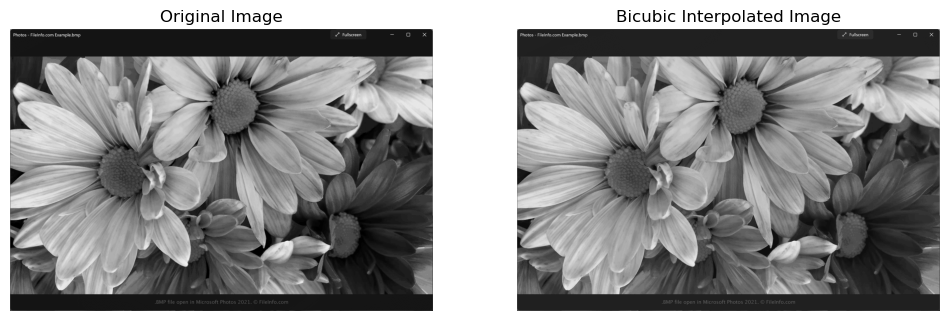

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def cubic(x):
    abs_x = np.abs(x)
    abs_x2 = abs_x ** 2
    abs_x3 = abs_x ** 3

    f = np.where(abs_x <= 1, 
                 1.5 * abs_x3 - 2.5 * abs_x2 + 1,
                 np.where(abs_x <= 2, 
                          -0.5 * abs_x3 + 2.5 * abs_x2 - 4 * abs_x + 2, 
                          0))
    return f

def bicubic_interpolation(img, scale_x, scale_y):
    original_height, original_width = img.shape
    new_height, new_width = int(original_height * scale_y), int(original_width * scale_x)
    new_img = np.zeros((new_height, new_width), dtype=np.uint8)

    for i in range(new_height):
        for j in range(new_width):
            x = j / scale_x
            y = i / scale_y

            x1 = int(np.floor(x))
            y1 = int(np.floor(y))

            interpolated_value = 0
            for m in range(-1, 3):
                for n in range(-1, 3):
                    xm = min(max(x1 + m, 0), original_width - 1)
                    yn = min(max(y1 + n, 0), original_height - 1)

                    weight = cubic(x - (x1 + m)) * cubic(y - (y1 + n))
                    interpolated_value += img[yn, xm] * weight

            new_img[i, j] = np.clip(interpolated_value, 0, 255)

    return new_img

image = cv2.imread('/home/nalin/Downloads/bmp_13.webp', cv2.IMREAD_GRAYSCALE)
scale_x, scale_y = 2, 2
resized_image = bicubic_interpolation(image, scale_x, scale_y)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(resized_image, cmap='gray')
plt.title('Bicubic Interpolated Image')
plt.axis('off')

plt.show()

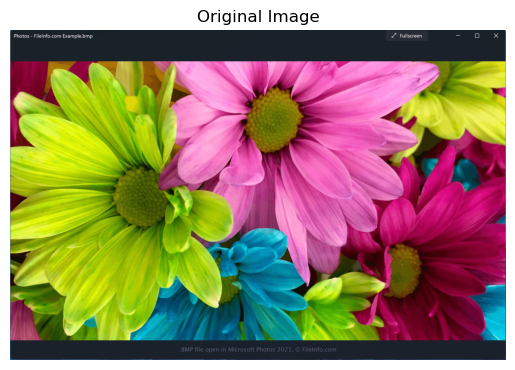

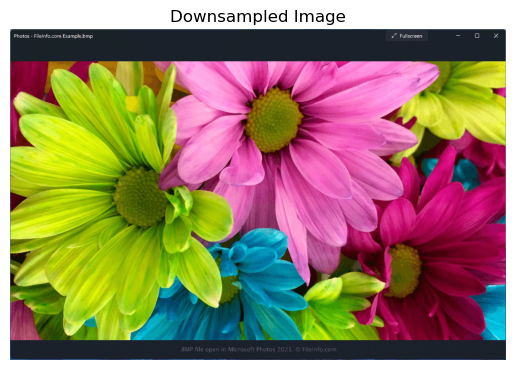

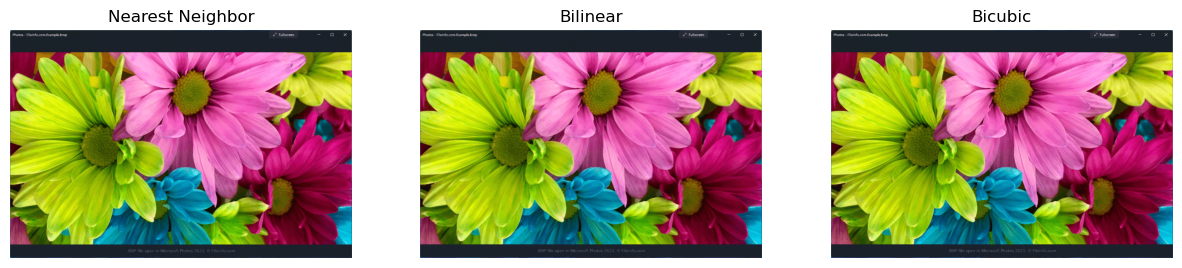

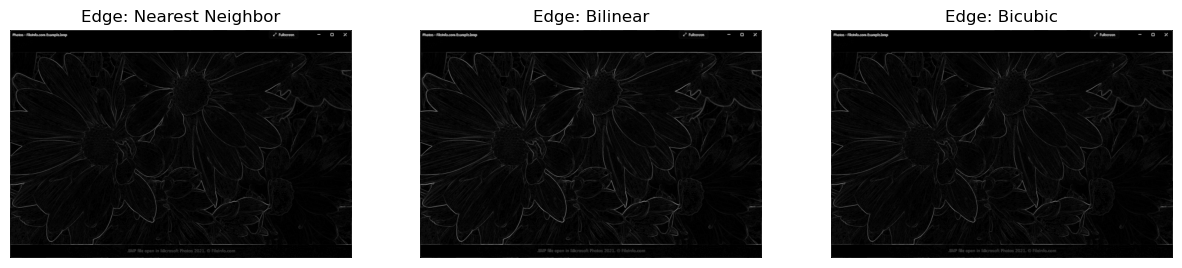

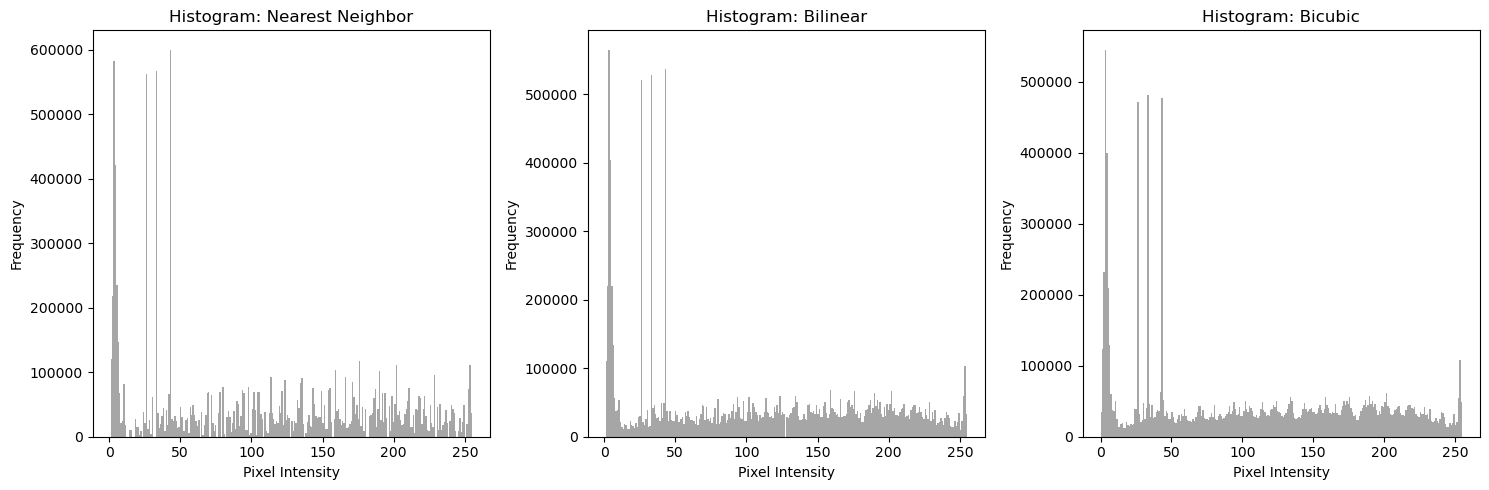

Original Image Dimensions: (1599, 2400, 3)
Downsampled Image Dimensions: (800, 1200, 3)
Nearest Neighbor Interpolated Image Dimensions: (1599, 2400, 3)
Bilinear Interpolated Image Dimensions: (1599, 2400, 3)
Bicubic Interpolated Image Dimensions: (1599, 2400, 3)


In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
# Function to display images
def display_image(image, title="Image", cmap=None):
    plt.imshow(image, cmap=cmap)
    plt.title(title)
    plt.axis('off')
    plt.show()

# Read the image
image = cv2.imread('/home/nalin/Downloads/bmp_13.webp')  # Replace with the actual image path
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB for display

# Display the original image
display_image(image_rgb, "Original Image")
# Downsample (decimate) the image by a factor of 2
downsampled_image = image_rgb[::2, ::2]

# Show the downsampled image
display_image(downsampled_image, "Downsampled Image")
# Get original image dimensions
original_size = (image_rgb.shape[1], image_rgb.shape[0])

# Interpolation methods
interpolations = {
    "Nearest Neighbor": cv2.INTER_NEAREST,
    "Bilinear": cv2.INTER_LINEAR,
    "Bicubic": cv2.INTER_CUBIC
}

# Resizing downsampled image using different interpolations
interpolated_images = {}
for interp_name, interp_method in interpolations.items():
    interpolated_images[interp_name] = cv2.resize(downsampled_image, original_size, interpolation=interp_method)

# Display interpolated images
plt.figure(figsize=(15, 5))
for i, (interp_name, img) in enumerate(interpolated_images.items()):
    plt.subplot(1, 3, i + 1)
    plt.imshow(img)
    plt.title(interp_name)
    plt.axis('off')
plt.show()
# Apply Sobel Edge Detection
def apply_sobel(image):
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    sobel_x = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=5)
    sobel_y = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=5)
    sobel_combined = cv2.magnitude(sobel_x, sobel_y)
    return sobel_combined

# Apply edge detection on interpolated images
edges = {name: apply_sobel(img) for name, img in interpolated_images.items()}

# Display edge-detected images
plt.figure(figsize=(15, 5))
for i, (name, edge_img) in enumerate(edges.items()):
    plt.subplot(1, 3, i + 1)
    plt.imshow(edge_img, cmap='gray')
    plt.title(f"Edge: {name}")
    plt.axis('off')
plt.show()
# Function to plot histograms
def plot_histogram(image, title):
    plt.hist(image.ravel(), bins=256, color='gray', alpha=0.7)
    plt.title(title)
    plt.xlabel("Pixel Intensity")
    plt.ylabel("Frequency")

# Plot histograms for each interpolated image
plt.figure(figsize=(15, 5))
for i, (name, img) in enumerate(interpolated_images.items()):
    plt.subplot(1, 3, i + 1)
    plot_histogram(img, f"Histogram: {name}")
plt.tight_layout()
plt.show()
# Verify dimensions of original, downsampled, and interpolated images
print(f"Original Image Dimensions: {image_rgb.shape}")
print(f"Downsampled Image Dimensions: {downsampled_image.shape}")
for name, img in interpolated_images.items():
    print(f"{name} Interpolated Image Dimensions: {img.shape}")

In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def bilinear_interpolation_optimized(img, scale_x, scale_y):
    # Original dimensions
    original_height, original_width = img.shape
    
    # New dimensions
    new_height, new_width = int(original_height * scale_y), int(original_width * scale_x)
    
    # Create grid of coordinates in the original image
    x = np.arange(new_width) / scale_x
    y = np.arange(new_height) / scale_y
    
    # Floor the coordinates to get integer positions
    x1 = np.floor(x).astype(int)
    y1 = np.floor(y).astype(int)
    
    # Ensure x1, y1 are within bounds
    x2 = np.clip(x1 + 1, 0, original_width - 1)
    y2 = np.clip(y1 + 1, 0, original_height - 1)
    
    # Calculate the differences (dx and dy)
    dx = x - x1
    dy = y - y1
    
    # Create 2D grids of x1, x2, y1, y2, dx, and dy
    x1, x2 = np.meshgrid(x1, x2, indexing='ij')
    y1, y2 = np.meshgrid(y1, y2, indexing='ij')
    dx, dy = np.meshgrid(dx, dy, indexing='ij')
    
    # Extract pixel values
    Q11 = img[y1, x1]
    Q21 = img[y1, x2]
    Q12 = img[y2, x1]
    Q22 = img[y2, x2]
    
    # Perform bilinear interpolation
    new_img = (1 - dx) * (1 - dy) * Q11 + dx * (1 - dy) * Q21 + \
              (1 - dx) * dy * Q12 + dx * dy * Q22
    
    return new_img.astype(np.uint8)

# Read the image in grayscale
image = cv2.imread('/home/nalin/Downloads/bmp_13.webp', cv2.IMREAD_GRAYSCALE)

# Scale factors
scale_x, scale_y = 2, 2  # Example: scaling by a factor of 2

# Apply optimized bilinear interpolation
resized_image = bilinear_interpolation_optimized(image, scale_x, scale_y)

# Display the original and interpolated images
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(resized_image, cmap='gray')
plt.title('Optimized Bilinear Interpolated Image')
plt.axis('off')

plt.show()


IndexError: shape mismatch: indexing arrays could not be broadcast together with shapes (3198,3198) (4800,4800) 

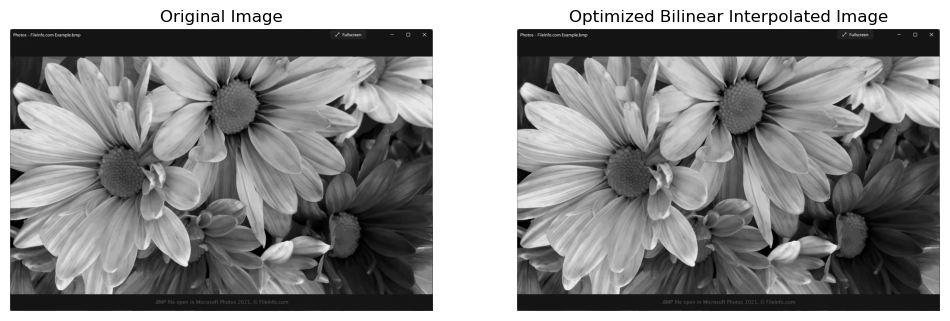

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def bilinear_interpolation_optimized(img, scale_x, scale_y):
    # Original dimensions
    original_height, original_width = img.shape
    
    # New dimensions
    new_height, new_width = int(original_height * scale_y), int(original_width * scale_x)
    
    # Create grid of coordinates in the new image
    x = np.arange(new_width) / scale_x
    y = np.arange(new_height) / scale_y
    
    # Floor the coordinates to get integer positions
    x1 = np.floor(x).astype(int)
    y1 = np.floor(y).astype(int)
    
    # Ensure x1, y1 are within bounds
    x2 = np.clip(x1 + 1, 0, original_width - 1)
    y2 = np.clip(y1 + 1, 0, original_height - 1)
    
    # Create 2D grids of x1, x2, y1, y2, dx, and dy using the new image's grid shape
    X, Y = np.meshgrid(x1, y1)
    X2, Y2 = np.meshgrid(x2, y2)
    Dx, Dy = np.meshgrid(x - x1, y - y1)
    
    # Extract pixel values
    Q11 = img[Y, X]
    Q21 = img[Y, X2]
    Q12 = img[Y2, X]
    Q22 = img[Y2, X2]
    
    # Perform bilinear interpolation
    new_img = (1 - Dx) * (1 - Dy) * Q11 + Dx * (1 - Dy) * Q21 + \
              (1 - Dx) * Dy * Q12 + Dx * Dy * Q22
    
    return new_img.astype(np.uint8)

# Read the image in grayscale
image = cv2.imread('/home/nalin/Downloads/bmp_13.webp', cv2.IMREAD_GRAYSCALE)

# Scale factors
scale_x, scale_y = 2, 2  # Example: scaling by a factor of 2

# Apply optimized bilinear interpolation
resized_image = bilinear_interpolation_optimized(image, scale_x, scale_y)

# Display the original and interpolated images
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(resized_image, cmap='gray')
plt.title('Optimized Bilinear Interpolated Image')
plt.axis('off')

plt.show()



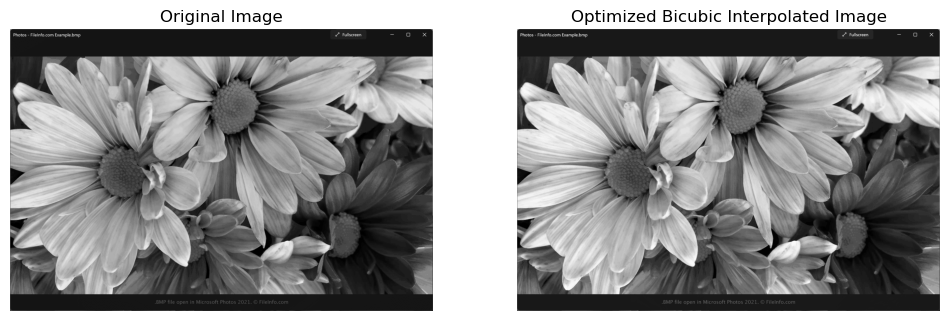

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Cubic interpolation function
def cubic(x):
    abs_x = np.abs(x)
    abs_x2 = abs_x ** 2
    abs_x3 = abs_x ** 3

    # Cubic interpolation formula
    f = np.where(abs_x <= 1, 
                 1.5 * abs_x3 - 2.5 * abs_x2 + 1,
                 np.where(abs_x <= 2, 
                          -0.5 * abs_x3 + 2.5 * abs_x2 - 4 * abs_x + 2, 
                          0))
    return f

# Bicubic interpolation function (vectorized)
def bicubic_interpolation_optimized(img, scale_x, scale_y):
    # Original dimensions
    original_height, original_width = img.shape

    # New dimensions
    new_height, new_width = int(original_height * scale_y), int(original_width * scale_x)

    # Create an empty array for the new image
    new_img = np.zeros((new_height, new_width), dtype=np.uint8)

    # Generate coordinate grids for new image
    x = np.arange(new_width) / scale_x
    y = np.arange(new_height) / scale_y
    
    # Compute the coordinates in the original image space
    x1 = np.floor(x).astype(int)
    y1 = np.floor(y).astype(int)

    # Ensure coordinates are within bounds
    x2 = np.clip(x1 + 1, 0, original_width - 1)
    y2 = np.clip(y1 + 1, 0, original_height - 1)

    # Calculate differences
    dx = x - x1
    dy = y - y1

    # Create meshgrids
    X1, Y1 = np.meshgrid(x1, y1)
    X2, Y2 = np.meshgrid(x2, y2)
    DX, DY = np.meshgrid(dx, dy)

    # Extract pixel values
    Q11 = img[Y1, X1]
    Q21 = img[Y1, X2]
    Q12 = img[Y2, X1]
    Q22 = img[Y2, X2]

    # Perform cubic interpolation
    weight_x1 = cubic(DX)
    weight_x2 = cubic(1 - DX)
    weight_y1 = cubic(DY)
    weight_y2 = cubic(1 - DY)

    new_img = (weight_x1 * weight_y1 * Q11 +
               weight_x2 * weight_y1 * Q21 +
               weight_x1 * weight_y2 * Q12 +
               weight_x2 * weight_y2 * Q22)
    
    return np.clip(new_img, 0, 255).astype(np.uint8)

# Read the image in grayscale
image = cv2.imread('/home/nalin/Downloads/bmp_13.webp', cv2.IMREAD_GRAYSCALE)

# Scale factors
scale_x, scale_y = 2, 2  # Example: scaling by a factor of 2

# Apply optimized bicubic interpolation
resized_image = bicubic_interpolation_optimized(image, scale_x, scale_y)

# Display the original and interpolated images
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(resized_image, cmap='gray')
plt.title('Optimized Bicubic Interpolated Image')
plt.axis('off')

plt.show()
